In [1]:
!pip install pandas

import pandas as pd
import numpy as np
import scipy
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt



In [ ]:

combined_df = pd.read_csv('test_log.csv', sep=';')
combined_df.head()

In [ ]:
for column in combined_df.columns:
    unique_values = combined_df[column].unique()
    print(f"Уникальные значения в колонке {column}: {unique_values} \n")

In [11]:
combined_df.drop(columns=['realuserid', 'other'], inplace=True)

In [ ]:
combined_df.dropna(inplace=True)
df_changed = combined_df.copy()
df_changed['relateduserid'] = df_changed['relateduserid'].astype(int)
df_changed['objectid'] = df_changed['objectid'].astype(int)

df_changed

In [13]:
!pip install keras

In [21]:
!pip install --upgrade scikit-learn

In [15]:
import torch
from torch.utils import data
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from torch import nn
import torch
from torch.utils import data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

In [16]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_changed[['eventname', 'component', 'action', 'target', 'objecttable', 'crud', 'contextlevel', 'origin']])

encoder = LabelEncoder()
encoded_ip = encoder.fit_transform(df_changed['ip'])
df_changed['encoded_ip'] = encoded_ip

columns = ['id', 'objectid', 'edulevel', 'contextid',
           'contextinstanceid', 'userid', 'courseid',
           'relateduserid', 'anonymous', 'timecreated', 'encoded_ip']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_changed[columns])

encoded_df = pd.concat([
    pd.DataFrame(encoded_features.toarray()),
    pd.DataFrame(data_scaled)], axis=1)

encoded_df

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.545692,-0.102486,-0.239759,0.014060,-9.896106,0.190108,1.241083,0.0,-10.623091,-1.294234
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.427114,-0.102486,-0.239759,0.014060,-9.896106,0.190108,1.241083,0.0,-10.623091,-1.294234
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.545693,-0.102486,-0.904864,-0.220266,-9.896106,-0.711231,1.241083,0.0,-10.617272,-1.294234
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.427114,-0.102486,-0.904864,-0.220266,-9.896106,-0.711231,1.241083,0.0,-10.617272,-1.294234
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.545693,-0.102486,-0.239812,0.013979,-9.896106,0.189798,1.241083,0.0,-10.612247,-1.294234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.548540,-0.102486,0.944346,0.217853,-0.055592,0.974004,-0.140369,0.0,0.460604,0.772658
23416,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.548541,-0.102486,0.944346,0.217853,-0.055592,0.974004,-0.110062,0.0,0.460869,0.772658
23417,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.548541,-0.102486,0.944346,0.217853,-0.055592,0.974004,-0.100040,0.0,0.460869,0.772658
23418,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.548541,-0.102486,0.944346,0.217853,-0.055592,0.974004,-0.091098,0.0,0.460869,0.772658


In [18]:
encoded_df.columns = [f'col_{i}' for i in range(1, len(encoded_df.columns) + 1)]
encoded_df.columns

Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15',
       'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22',
       'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29',
       'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36',
       'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43',
       'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50',
       'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57',
       'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64',
       'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70', 'col_71'],
      dtype='object')

In [24]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039177 sha256=ee46f9e9713f84536bfef8bd2ae8ae4ef494bfeab135893d3e847d0b175eb241
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan


Estimated number of clusters: 1118
Estimated number of noise points: 4173
Silhouette Coefficient: 0.339


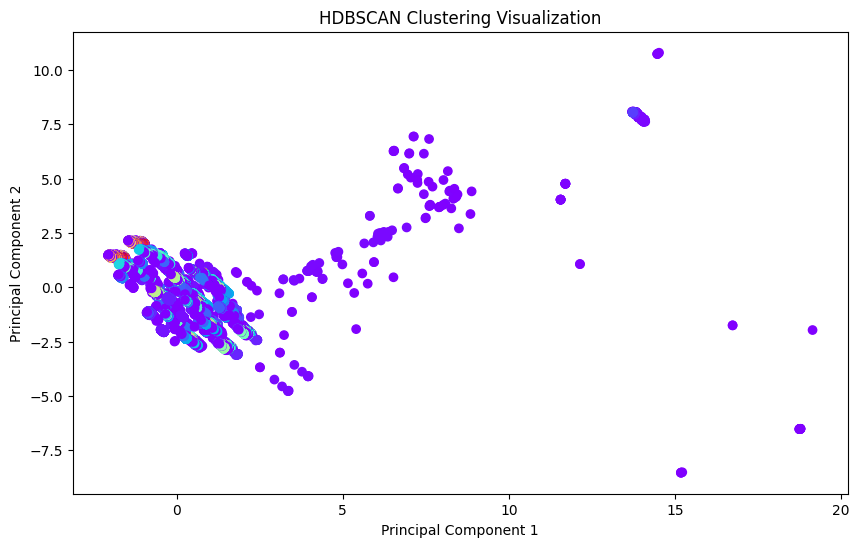

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_digits
import hdbscan

# Create HDBSCAN instance
hdbscan_instance = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

# Fit the model to your data
cluster_labels = hdbscan_instance.fit_predict(encoded_df)

# Number of clusters in labels, ignoring noise if present.
labels = hdbscan_instance.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"Silhouette Coefficient: {metrics.silhouette_score(encoded_df, labels):.3f}")

# Visualize the clustering results (e.g., 2D projection)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('HDBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Estimated number of clusters: 93
Estimated number of noise points: 201
Silhouette Coefficient: 0.588


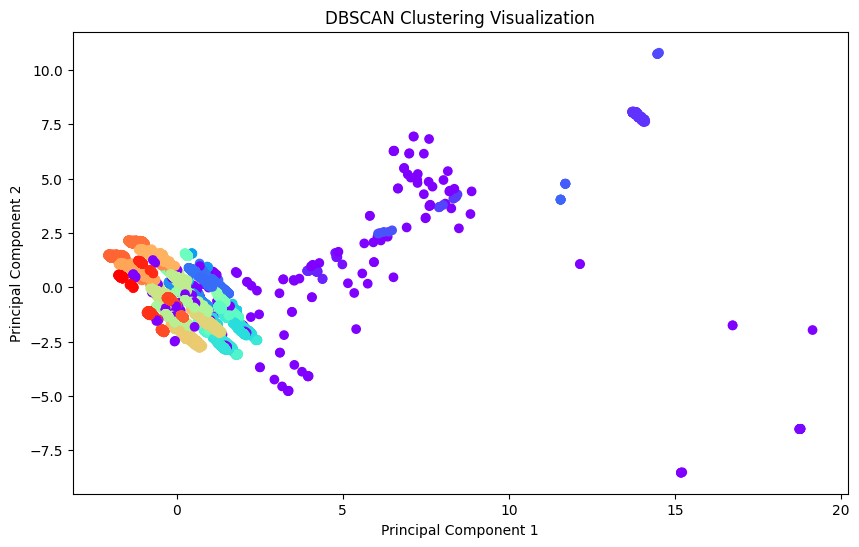

In [30]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict clusters
cluster_labels = dbscan.fit_predict(encoded_df)

# Visualize the clustering results (e.g., 2D projection)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df)

from sklearn import metrics

# Number of clusters in labels, ignoring noise if present.
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"Silhouette Coefficient: {metrics.silhouette_score(encoded_df, labels):.3f}")

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()